In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv("homeprices_banglore.csv")

In [4]:
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [5]:
df.sample(5)

,area,bedrooms,price
10,1800,3,82.0
13,1100,2,40.0
17,1540,3,60.0
1,2600,4,120.0
19,800,1,32.0


In [8]:
#use min-max scaling (range of 0 to 1)
from sklearn import preprocessing
X_scaling = preprocessing.MinMaxScaler()
y_scaling = preprocessing.MinMaxScaler()



array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [37]:
scaled_X = X_scaling.fit_transform(df.drop('price',axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [40]:
scaled_y = y_scaling.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

scaled_y.reshape(20,) #covert the target column 2d into 1d

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

### 1. Batch Gradient Descent Implementation 

Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction

price = w1*area + w2*bendrooms + bias

In [43]:
def batch_gradient_descent(X,y_true, epochs, learning_rate = 0.01) :
    
    number_of_features = X.shape[1]
    
    w = np.ones(shape = (number_of_features)) #initualize the weights one
    b = 0 #initialze bias 0
    total_samples = X.shape[0]  # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) +b # w1*area + w2*bendrooms 
        
        #find the derivative of loss with respective weights
        w_grad = -(2/total_samples) *(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)* np.sum(y_true - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true- y_predicted))  # MSE (Mean Squared Error)
        
        
        #here we got the optimual value of cost , bias and weights
        if i % 10 == 0 :
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w,b,cost,cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
print("Weight:",w)
print("bias", b)
print("cost",cost)


Weight: [0.70712464 0.67456527]
bias -0.23034857438407422
cost 0.0068641890429808105


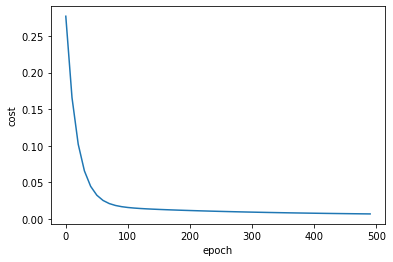

In [44]:
#Plot the batch - gradient graph

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)


In [45]:

def predict(area,bedrooms,w,b):
    scaled_X = X_scaling.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return y_scaling.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

128.45484403267596

In [46]:
predict(1000, 2, w,b)

30.253094462442363

In [50]:
predict(1900,3,w,b)

82.64575637769657

### 2. Stochastic Gradient descent Implementation

Stochastic GD will use randomly picked single training sample to calculate error and using this error we backprpage to adjust weights

In [51]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument



5

In [59]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd


(array([0.70302731, 0.67309997]), -0.22767231085633277, 0.010666856754081962)

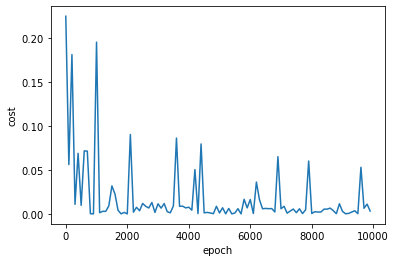

In [60]:
#plot the sgd graph 

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [61]:

predict(2600,4,w_sgd, b_sgd) 

128.3244498135258

In [62]:

predict(1000,2,w_sgd, b_sgd)

30.52678859007406

In [63]:

predict(1500,3,w_sgd, b_sgd)

69.60747917377648

### 3. Min Batch GD

 we use a batch of m samples where 0 < m < n (where n is total number of training samples)

In [65]:
np.random.permutation(20)

array([16,  7, 10, 11,  4,  3, 15, 19, 14, 17, 12,  9,  6,  8,  5,  1, 18,
        0,  2, 13])

In [69]:
def mini_batch_gd(X, y_true, epochs =100, batch_size = 5, learning_rate = 0.01):
   
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
    
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs) :
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0, total_samples, batch_size) :
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
            
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_mini_gd, b_mini_gd, cost_mini_gd, cost_list_mini_gd, epoch_list_mini_gd = mini_batch_gd(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)

print("weights",w_mini_gd)
print("bias",b_mini_gd)
print("cost",cost_mini_gd)

weights [0.7100294  0.67810551]
bias -0.23332733239068904
cost 0.001920831010053101


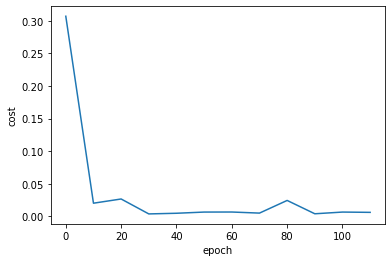

In [71]:
#plot the mini batch gd
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [72]:

def predict(area,bedrooms,w,b):
    scaled_X = X_scaling.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return y_scaling.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

128.63729155840778

In [73]:

predict(1000,2,w,b)

29.978266155566345

In [74]:

predict(1500,3,w,b)


69.39107962154583